<a href="https://colab.research.google.com/github/hrushikesh-shelar/Optimizing-the-test-time-for-Mercedez-Benz-for-Greener-Manufacturing/blob/main/Greener_Manufacturing_Mercedes_Benz_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Module & Import Libs

In [ ]:
%%capture
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.model_selection import train_test_split as tts

from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interactive

##Import Dataset

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/i-am-hrushi/datasets/master/me504_project_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/i-am-hrushi/datasets/master/me504_project_test.csv')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(4209, 378)
(4209, 377)


## Data Visualisation & Preprocessing

In [ ]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


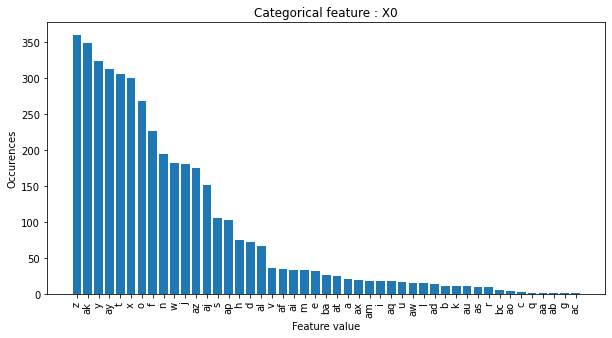

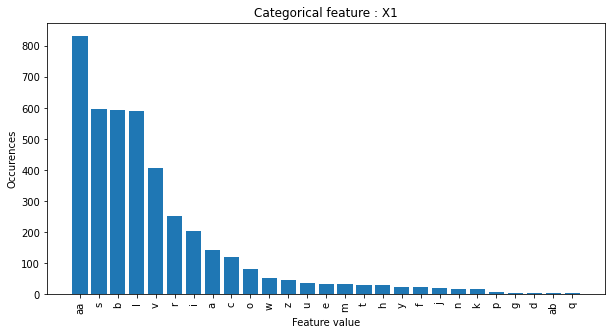

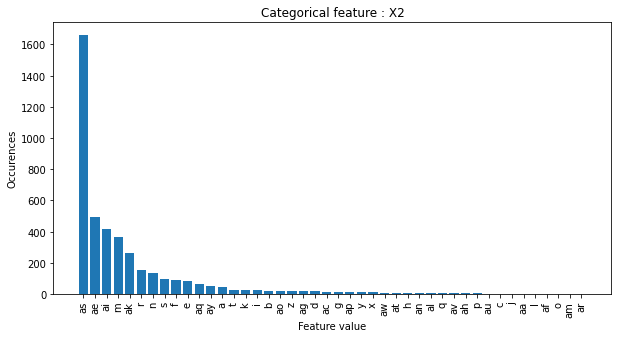

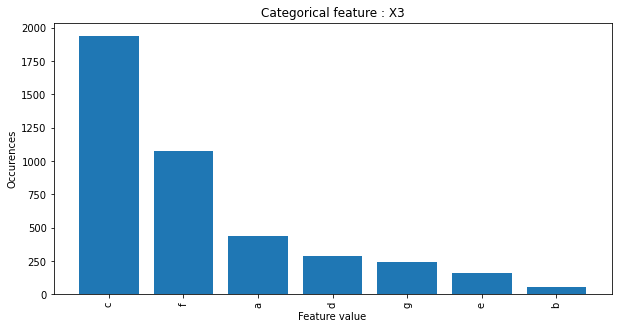

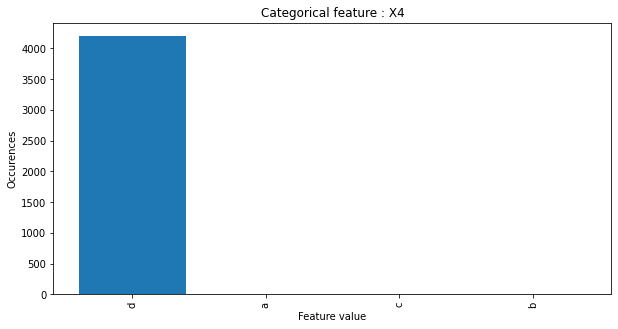

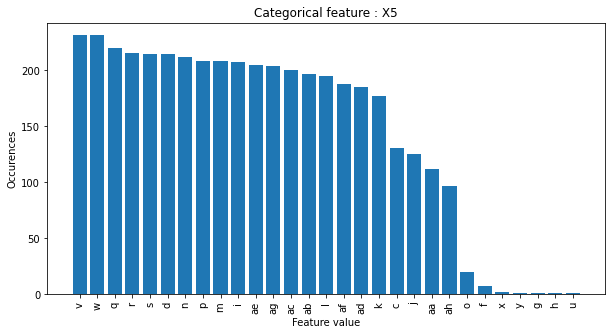

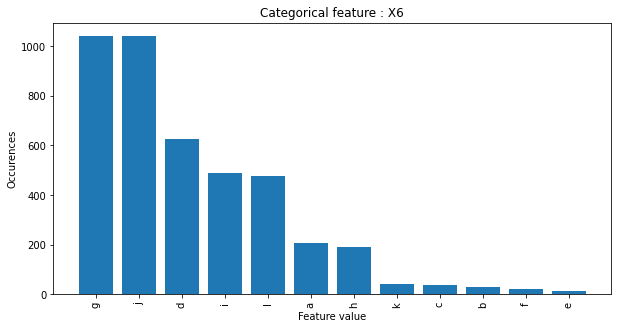

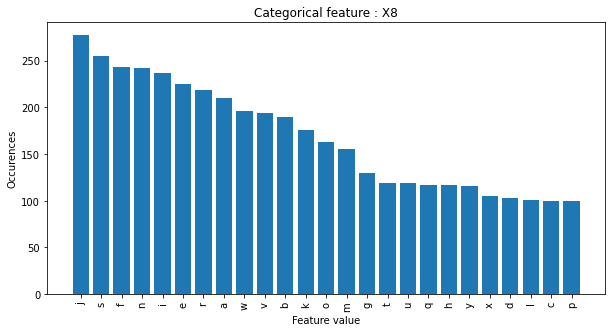

In [ ]:
vars=[]
for v in df_train.columns:
  if df_train[v].dtypes == 'O':
    vars.append(v);

def show(c):
    y = df_train[c].value_counts()
    fig,ax = plt.subplots(figsize = (10,5))
    tit='Categorical feature : ' + str(c); 
    plt.title(tit);
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(y)), y.values)
    ax.set_xticks(range(len(y)))
    ax.set_xticklabels(y.index, rotation='vertical')
    plt.show()
for c in vars:
  show(c);

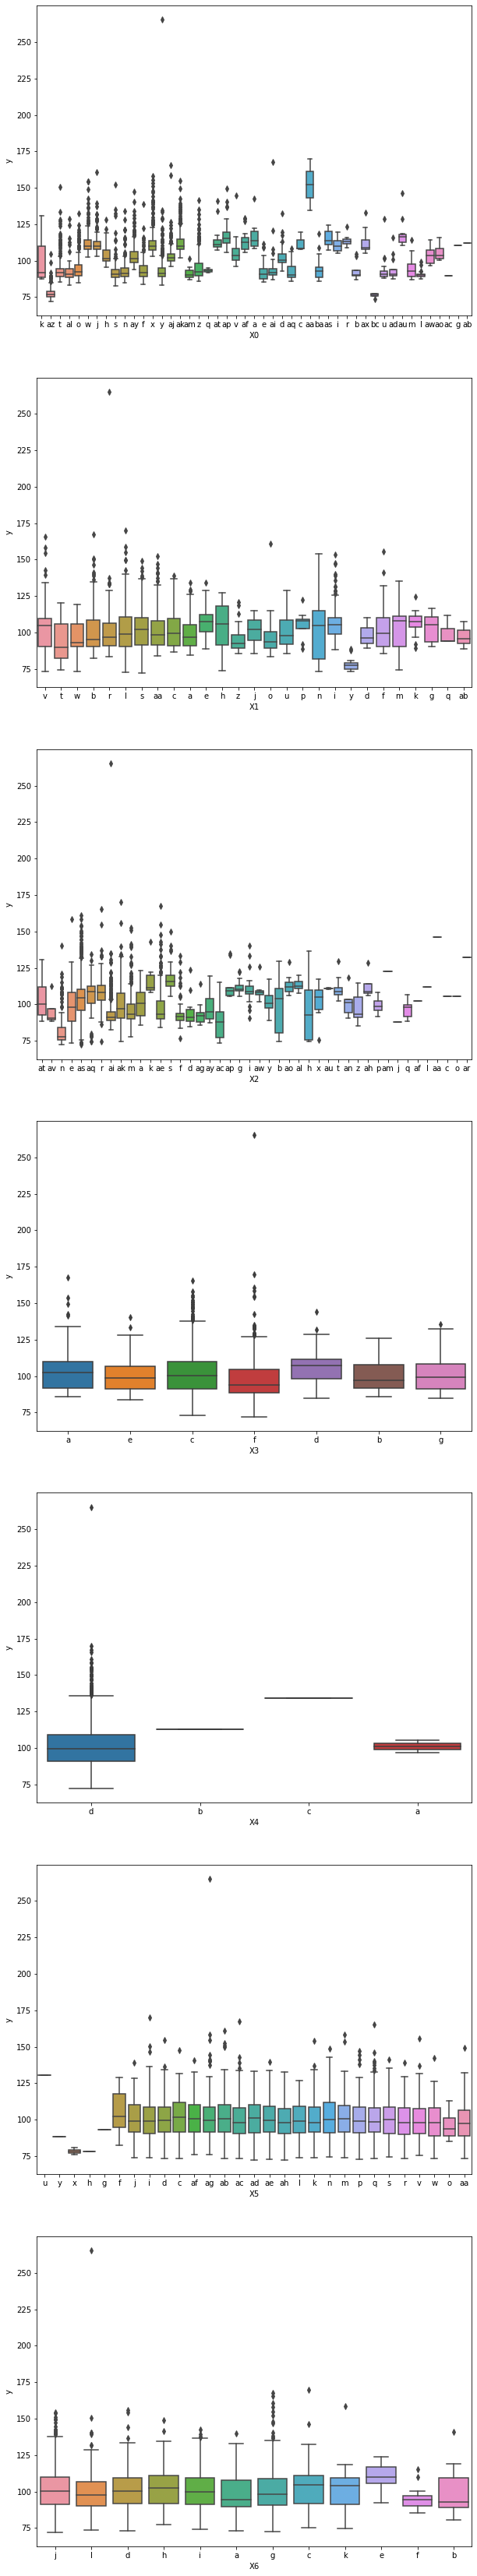

In [ ]:
f, axes = plt.subplots(7, 1, figsize=(10, 60))
for i in range(0,7):
  k="X"+str(i);
  sns.boxplot(x = df_train[k] , y = "y" , data= df_train,ax=axes[i]);

<Figure size 1080x1080 with 0 Axes>

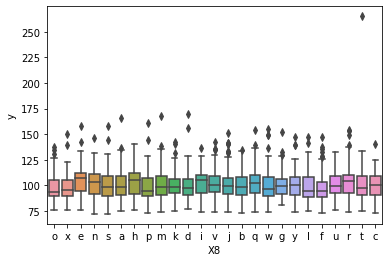

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.boxplot(x = df_train["X8"] , y = "y" , data= df_train)
plt.figure(figsize = (15, 15))

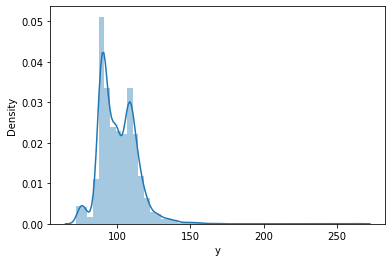

In [ ]:
import warnings
warnings.simplefilter('ignore')

sns.distplot(df_train["y"])
plt.show()

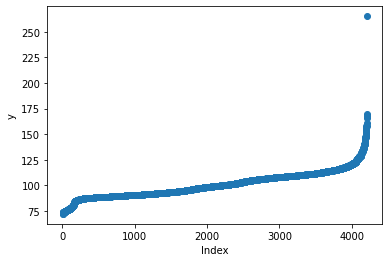

In [ ]:
temp = df_train.sort_values(by = 'y')
plt.scatter(x = np.arange(1, df_train.shape[0]+1, 1), y = temp['y'])
plt.xlabel('Index')
plt.ylabel('y')
plt.show()

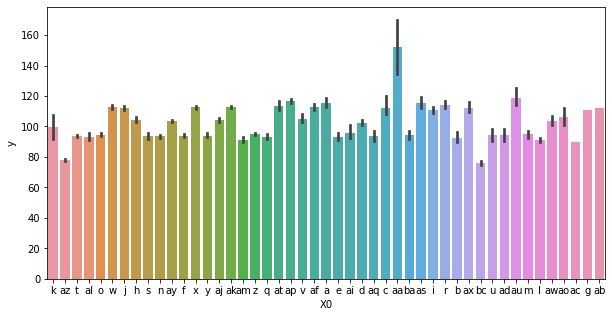

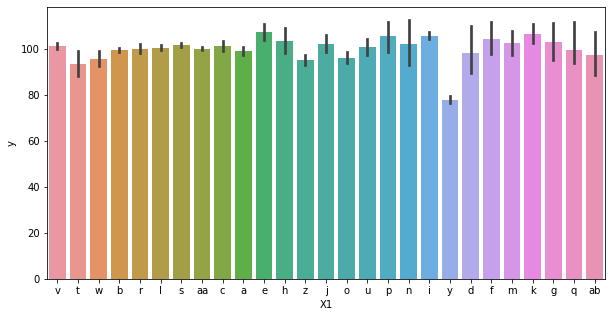

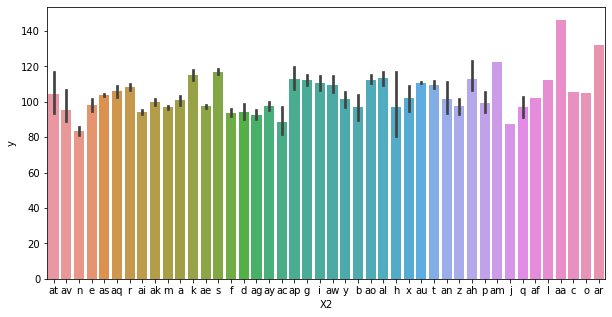

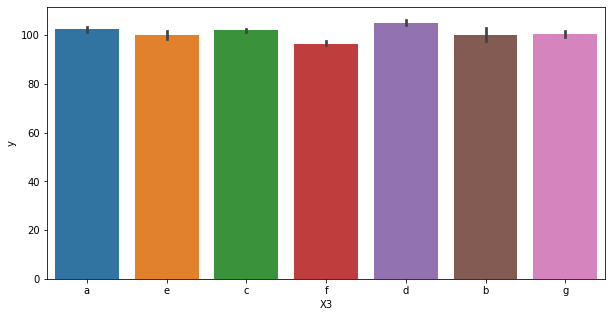

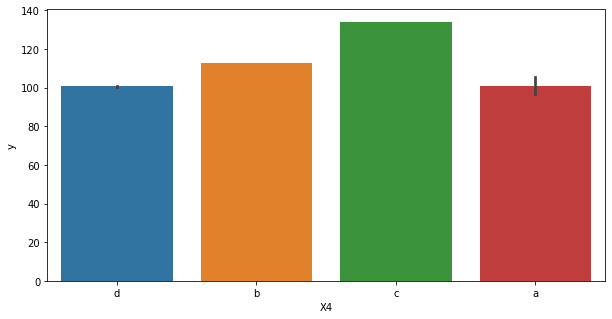

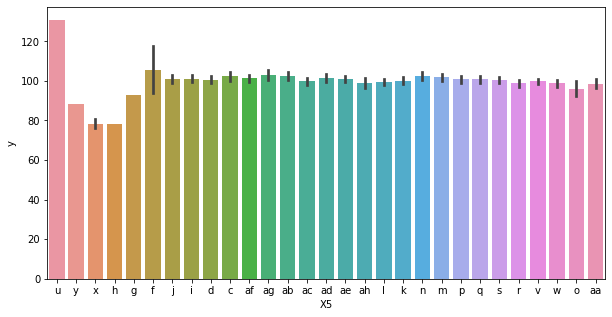

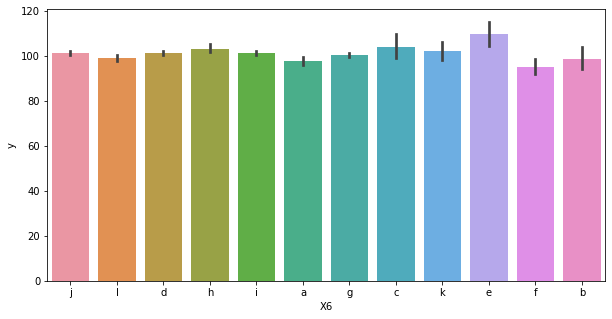

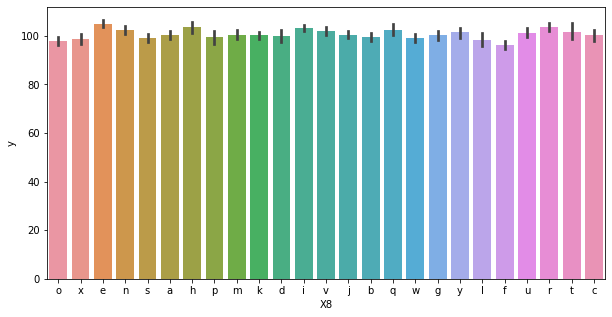

In [ ]:
def show2(c):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x = c, y = "y" , data = df_train)

for c in vars:
  show2(c);

# interact2 = interactive(show2,c=vars);
# interact2

# ##Encoding & Feature Scaling

In [ ]:
# One Hot Encoding

temp1 = pd.get_dummies(df_train, columns=df_train.select_dtypes('object').columns.to_list(), drop_first=True)
temp2 = pd.get_dummies(df_test, columns=df_train.select_dtypes('object').columns.to_list(), drop_first=True)

cols1 = temp1.columns.to_list()
cols2 = temp2.columns.to_list()
cols_uni = list(set(cols1) | set(cols2))

cols1_new = [x for x in cols_uni if x not in cols1]
cols2_new = [x for x in cols_uni if x not in cols2]

for i in cols1_new:
    temp1[i] = 0
for i in cols2_new:
    if i == 'y':
        continue
    temp2[i] = 0

df_train = temp1[sorted(temp1)]
df_test = temp2[sorted(temp2)]

In [ ]:
df_train.drop(index = df_train[df_train['y']>200].index[0], axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop=True)

In [ ]:
df_train.shape

(4208, 573)

In [ ]:
df_test.shape

(4209, 572)

In [ ]:
cols_drop = []
for i in df_train.columns:
    if df_train[i].nunique()==1:
        print(i,": ",df_train[i].nunique())
        cols_drop.append(i)

print("\n",cols_drop,"\nlength:",len(cols_drop))

X0_ae :  1
X0_ag :  1
X0_an :  1
X0_av :  1
X0_bb :  1
X0_p :  1
X107 :  1
X11 :  1
X233 :  1
X235 :  1
X268 :  1
X289 :  1
X290 :  1
X293 :  1
X297 :  1
X2_ab :  1
X2_ad :  1
X2_aj :  1
X2_ax :  1
X2_u :  1
X2_w :  1
X330 :  1
X347 :  1
X5_aa :  1
X5_b :  1
X5_t :  1
X5_z :  1
X93 :  1

 ['X0_ae', 'X0_ag', 'X0_an', 'X0_av', 'X0_bb', 'X0_p', 'X107', 'X11', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X2_ab', 'X2_ad', 'X2_aj', 'X2_ax', 'X2_u', 'X2_w', 'X330', 'X347', 'X5_aa', 'X5_b', 'X5_t', 'X5_z', 'X93'] 
length: 28


In [ ]:
df_train.drop(columns = cols_drop, inplace = True)
df_test.drop(columns = cols_drop, inplace = True)

In [ ]:
X , y =  df_train.drop(columns = ['ID','y']) , df_train['y']
test = df_test.drop(columns = ['ID'])

In [ ]:
X.shape

(4208, 543)

##PCA

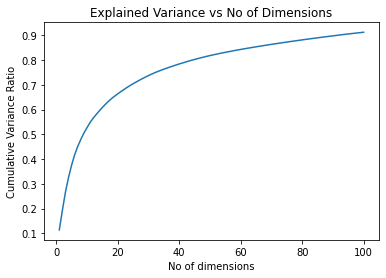

No. of reduced dimensions: 45


In [ ]:
from sklearn.decomposition import PCA
components = 100
pca = PCA(n_components = components, random_state = 41)
pca.fit(X)
X_pca = pca.transform(X)
Test_pca = pca.transform(test)


var = np.cumsum(pca.explained_variance_ratio_)
for i in range(len(var)):
  if var[i] >= 0.80:
    break
n_required = i+1


plt.plot(np.linspace(1,100,100),var)
plt.xlabel("No of dimensions")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Explained Variance vs No of Dimensions")
plt.show()
print("No. of reduced dimensions:",n_required)

In [ ]:
n_components = n_required

pca = PCA(n_components = n_components, random_state = 40)
pca.fit(X)
X_pca = pca.transform(X)
test_pca = pca.transform(test)

##DL Model

In [ ]:
def create_model():

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(16, input_shape=(45,), activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss = 'mse' ) #metrics = [r2_score]

    return model

In [ ]:
X_train, X_test, y_train, y_test = tts(X_pca, y, test_size = 0.20, random_state = 42)


n_split = 5

train_score = []
test_score = []

i = 0

for train_index,test_index in KFold(n_split).split(X):
    
    i = i+1

    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    
    model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"Fold No. {i}:")
    print("train: ",r2_score(y_train, y_pred_train))
    train_score.append(r2_score(y_train, y_pred_train))

    print("test:  ",r2_score(y_test, y_pred))
    test_score.append(r2_score(y_test, y_pred))

print(f"\nAverage Scores:\ntrain:  {sum(train_score)/5}\ntest:  {sum(test_score)/5}")

Fold No. 1:
train:  0.6027293915238715
test:   0.46140368915212093
Fold No. 2:
train:  0.6177954862170771
test:   0.44975917182903513
Fold No. 3:
train:  0.5962751684158136
test:   0.504439670473827
Fold No. 4:
train:  0.6211976181465751
test:   0.44217236397353066
Fold No. 5:
train:  0.5969256613540557
test:   0.5154851000358245

Average Scores:
train:  0.6069846651314786
test:  0.4746519990928676


In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 16)                736       
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 9         
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_pca, y)
prediction = model.predict(test_pca)

submit = pd.DataFrame(data = df_test.ID, columns=['ID'])
submit['y'] = prediction

submit.to_csv('submit_mercedes.csv',index=False)

132/132 [==============================] - 0s 1ms/step - loss: 64.8372


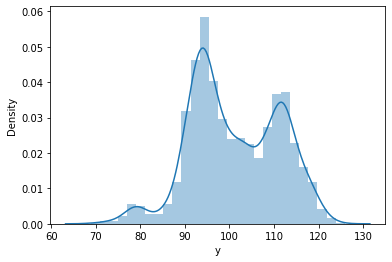

In [ ]:
import warnings
warnings.simplefilter('ignore')

sns.distplot(submit["y"])
plt.show()